In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [10]:
data = pd.read_csv('dataset/office_used_time.csv')

In [11]:
df = pd.DataFrame(data['check_stay_time_second'] / 3600)

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


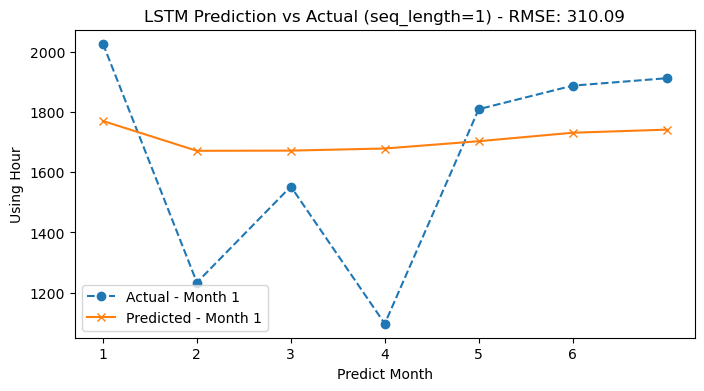

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


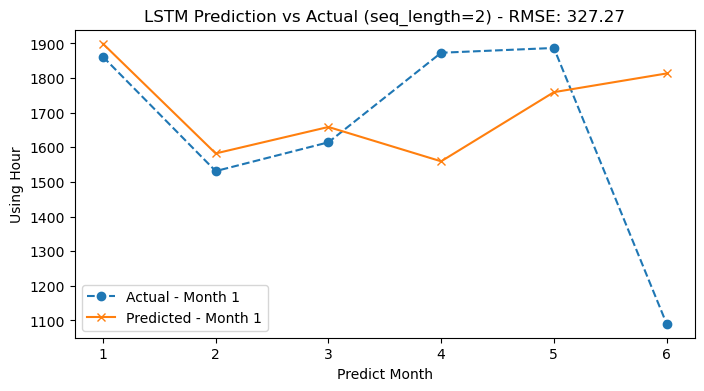

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


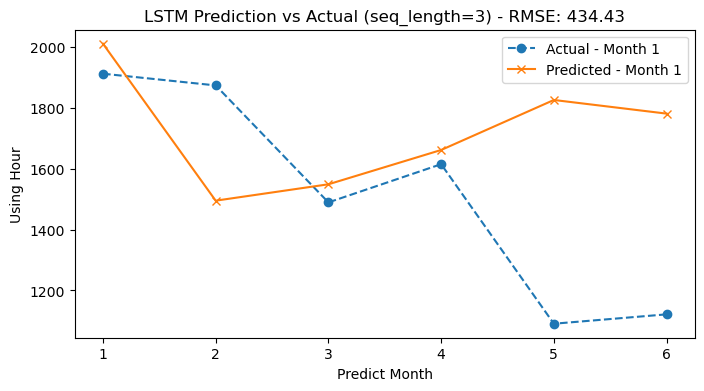

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


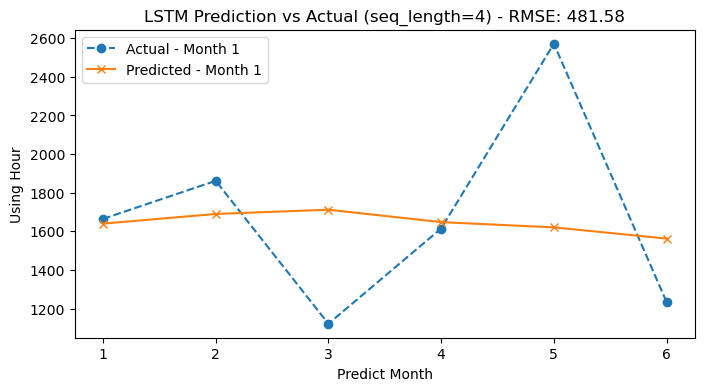

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


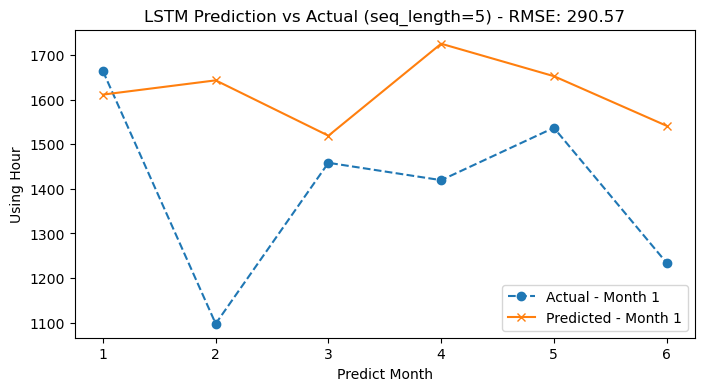

c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


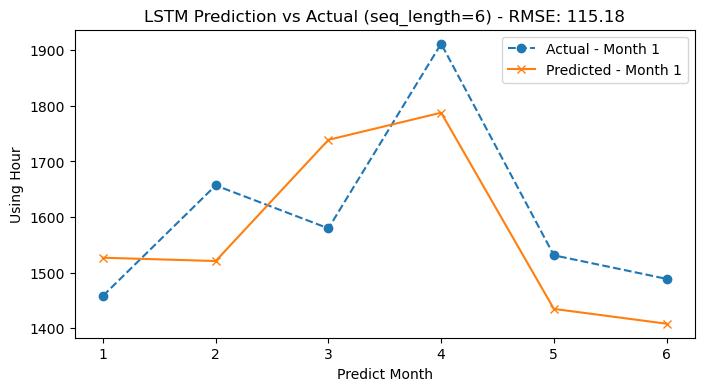

In [12]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 시퀀스 데이터 생성 함수 (여러 개월 예측 가능하도록 수정)
def create_sequences(data, seq_length, forecast_horizon=6):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + forecast_horizon].flatten())
    return np.array(X), np.array(y)

# 결과 저장용 리스트
rmse_scores = []
plots = []
seq_lengths = range(1, 7)
forecast_horizon = 1
epochs = 250
batch_size = 32

# 각 시퀀스 길이마다 모델 학습 및 예측
for seq_length in seq_lengths:
    # 시퀀스 데이터 생성
    X, y = create_sequences(scaled_data, seq_length, forecast_horizon)
    
    # 학습 및 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # LSTM 모델 구축
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu'))
    model.add(Dense(forecast_horizon))
    
    model.compile(optimizer='adam', loss='mse')
    
    # 모델 학습
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    
    # 예측 및 스케일 역변환
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)
    
    # RMSE 계산 (각 시퀀스별 RMSE 평균을 사용)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # 시각화 저장
    plt.figure(figsize=(8, 4))
    for i in range(forecast_horizon):
        plt.plot(y_test[:, i], label=f'Actual - Month {i+1}', linestyle='--', marker='o')
        plt.plot(y_pred[:, i], label=f'Predicted - Month {i+1}', linestyle='-', marker='x')
    plt.title(f"LSTM Prediction vs Actual (seq_length={seq_length}) - RMSE: {rmse:.2f}")
    plt.xlabel("Predict Month")
    plt.ylabel("Using Hour")
    plt.xticks(range(0, 6), range(1, 7))
    plt.legend()
    plt.show()

Best seq_length: 6, RMSE: 115.18


c:\Users\seoho\Anaconda3\envs\ML_python3_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


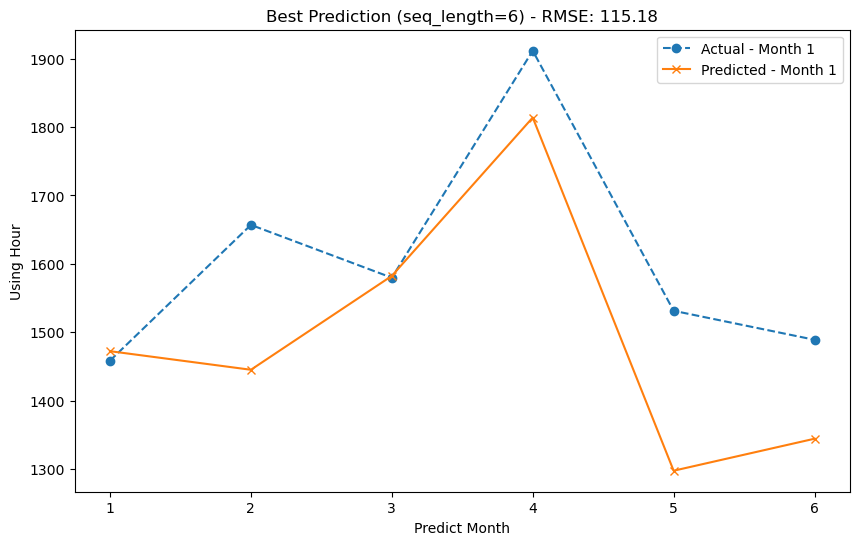

In [13]:
# 최적의 seq_length 찾기
best_seq_length = seq_lengths[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)

# 최적의 seq_length 및 해당 RMSE 출력
print(f"Best seq_length: {best_seq_length}, RMSE: {best_rmse:.2f}")

# 최적의 seq_length에 해당하는 시각화 출력
X, y = create_sequences(scaled_data, best_seq_length, forecast_horizon)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(forecast_horizon))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# 최적의 시퀀스 길이에 대한 플롯
plt.figure(figsize=(10, 6))
for i in range(forecast_horizon):
    plt.plot(y_test[:, i], label=f'Actual - Month {i+1}', linestyle='--', marker='o')
    plt.plot(y_pred[:, i], label=f'Predicted - Month {i+1}', linestyle='-', marker='x')
plt.title(f"Best Prediction (seq_length={best_seq_length}) - RMSE: {best_rmse:.2f}")
plt.xlabel("Predict Month")
plt.ylabel("Using Hour")
plt.xticks(range(0, 6), range(1, 7))
plt.legend()
plt.show()